<a href="https://colab.research.google.com/github/siddhamapple/LLM/blob/main/Learning_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio # Install PyTorch if you haven't already
import torch # Import the torch module

In [ ]:
import torch
torch.__version__

'2.5.1+cu124'

# **Starting Pytorch** (Appendix A)
## creating pytorch tensors and playing with matrix



In [ ]:
import torch

tensor0d = torch.tensor(1)
tensor1d= torch.tensor([1,2])
tensor2d= torch.tensor([[1,2],[3,4]])
tensor3d=torch.tensor( [[[1,2],[3,4]],
                      [[4,5],[6,7]]]
                            )

print(tensor3d.shape)
tensor3d.reshape(1,8)
print(tensor2d)
print(tensor2d.T) #transpose of a matrix
print(tensor2d.matmul(tensor2d.T))

torch.Size([2, 2, 2])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 3],
        [2, 4]])
tensor([[ 5, 11],
        [11, 25]])


## tensor datatypes


In [ ]:
print(tensor1d.dtype)

torch.int64


In [ ]:
tensor1d.dtype

torch.int64

In [ ]:
import torch
floattensor=torch.tensor([1.2,2.3,343.2])

In [ ]:
print(floattensor.dtype)

torch.float32


## Logistic regression Forward Pass

In [ ]:
import torch.nn.functional as F
y=torch.tensor([1.0])
x=torch.tensor([1.1])
w=torch.tensor([2.2])
b=torch.tensor([0.0])
u=x*w
z=u+b
a=torch.sigmoid(z)
loss=F.binary_cross_entropy(a,y) #BCE is used when we want binary (0,1)

## Computing gradients via autograd

In [ ]:
# @title Default title text
import torch
import torch.nn.functional as F
from torch.autograd import grad

x1=torch.tensor([1.1]) #input 1
w1=torch.tensor([2.2],requires_grad=True) #weight of input 1
y1=torch.tensor([1.0]) #label
b1=torch.tensor([0.0],requires_grad=True) #adding bias

z=(x1*w1)+b1
a=torch.sigmoid(z)
L=F.binary_cross_entropy(a,y1)

gw1=grad(L,w1,retain_graph=True)
gb1=grad(L,b1,retain_graph=True)

print(gw1)
print(gb1)



(tensor([-0.0898]),)
(tensor([-0.0817]),)


## multilayer perceptron with two hidden layers

In [ ]:
import torch
import torch.nn as N


class NeuralNetwork(N.Module):
    def __init__(self,inputP,outputP):
     super().__init__()

     self.layers=torch.nn.Sequential(
        torch.nn.Linear(inputP,30),
        N.ReLU(),

        torch.nn.Linear(30,20),
        torch.nn.ReLU(),

        torch.nn.Linear(20,outputP)
    )


    def forward(self,x):
     logits=self.layers(x)
     return logits


model=NeuralNetwork(50,3)

#print(model)

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad==True)
#print("Total number of trainable model parameters:", num_params)

#print(model.layers[0].weight.shape)


#torch.manual_seed(1223)
#model=NeuralNetwork(50,3)
#print(model.layers[0].weight)



torch.manual_seed(123)

x=torch.rand(1,50)

with torch.no_grad():
 out=torch.softmax(model(x),dim=-1)
print(out)


tensor([[0.3640, 0.2864, 0.3496]])


## Efficient data loaders

Data set (stores data)

In [ ]:
import torch
from torch.utils.data import Dataset

X_train = torch.tensor([
[-1.2, 3.1],
[-0.9, 2.9],
[-0.5, 2.6],
[2.3, -1.1],
[2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])
X_test = torch.tensor([
[-0.8, 2.8],
[2.6, -1.6],])
y_test = torch.tensor([0, 1])


class ToyDataset(Dataset):
  def __init__(self,X,Y):
    self.features=X
    self.labels=Y

  def __getitem__(self,index):
    one_x=self.features[index]
    one_y=self.features[index]

  def __len__(self):
    return self.labels.shape[0]

train_ds=ToyDataset(X_train,y_train)
test_ds=ToyDataset(X_test,y_test)

print(len(train_ds))



5


Data loader (loads data)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

torch.manual_seed(123)


X_train = torch.tensor([
[-1.2, 3.1],
[-0.9, 2.9],
[-0.5, 2.6],
[2.3, -1.1],
[2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])
X_test = torch.tensor([
[-0.8, 2.8],
[2.6, -1.6],])
y_test = torch.tensor([0, 1])


class ToyDataset(Dataset):
   def __init__(self,X,Y):
    self.feature=X
    self.label=Y

   def __getitem__(self,index):
    one_X=self.feature[index]
    one_Y=self.feature[index]
    return one_X, one_Y

   def __len__(self):
    return self.label.shape[0]


train_ds=ToyDataset(X_train,y_train)
test_ds=ToyDataset(X_test,y_test)
#


train_loader = DataLoader(dataset=train_ds,batch_size=2,shuffle=True,
                          num_workers=0,drop_last=True

)
test_loader=DataLoader(dataset=test_ds,shuffle=True,batch_size=2,num_workers=0
                       ,drop_last=True)


for idx, (X,Y) in enumerate(train_loader):
  print(f"Batch {idx+1} = ", X , Y)

Batch 1 =  tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]])
Batch 2 =  tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]])


## A typical training loop (rewrote everything above again )

In [ ]:
import torch
import torch.nn as N
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

class NeuralNetwork(N.Module):
  def __init__(self,inputP,outputP):
    super().__init__()

    self.layers=N.Sequential(

             N.Linear(inputP,30),
             N.ReLU(),

             N.Linear(30,20),
             N.ReLU(),

             N.Linear(20,outputP)
   )

  def forward(self,x):
    logits=self.layers(x)
    return logits

#model=NeuralNetwork(50,3)


## data loader and set
X_train = torch.tensor([
[-1.2, 3.1],
[-0.9, 2.9],
[-0.5, 2.6],
[2.3, -1.1],
[2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])
X_test = torch.tensor([
[-0.8, 2.8],
[2.6, -1.6],])
y_test = torch.tensor([0, 1])


class ToyData(Dataset):
  def __init__(self,X,Y):
    self.feature=X
    self.label=Y

  def __getitem__(self,iterator):
    one_x=self.feature[iterator]
    one_y=self.label[iterator]
    return one_x,one_y

  def __len__(self):
    return self.label.shape[0]

train_ds=ToyData(X_train,y_train)
test_ds=ToyData(X_test,y_test)

loadtrain=DataLoader(dataset=train_ds,batch_size=2,shuffle=True,num_workers=0,drop_last=True)
loadtest=DataLoader(dataset=test_ds,shuffle=True,batch_size=2,num_workers=0,drop_last=True)

#----------------------training loop starts------------------------------------------------
model =NeuralNetwork(2,2)
optimizer=torch.optim.SGD(
  model.parameters(),  lr=0.76
)
num_epoch=3

for epoch in range(num_epoch):
  model.train()

  for batch_idx,(feature,label) in enumerate(loadtrain):
    logit=model(feature)
    loss=F.cross_entropy(logit,label)

    optimizer.zero_grad()
    loss.backward() #calculate gradients
    optimizer.step() # this will change model parameters to minimize loss



    print(f"Epoch: {epoch+1:03d}/{num_epoch:03d}"
    f" | Batch {batch_idx+1:03d}/{len(loadtrain):03d}"
    f" | Train Loss: {loss:.2f}")

model.eval()
with torch.no_grad():
  output=model(X_train)
print(output)

prob=torch.softmax(output,dim=1)
probability=torch.argmax(prob,dim=1)
print(probability)

print(probability==y_train)


Epoch: 001/003 | Batch 001/002 | Train Loss: 0.46
Epoch: 001/003 | Batch 002/002 | Train Loss: 2.42
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.45
Epoch: 002/003 | Batch 002/002 | Train Loss: 0.06
Epoch: 003/003 | Batch 001/002 | Train Loss: 0.02
Epoch: 003/003 | Batch 002/002 | Train Loss: 0.01
tensor([[ 2.4249, -4.5732],
        [ 2.1745, -4.1268],
        [ 1.8197, -3.4941],
        [-2.3790,  1.9572],
        [-2.8630,  2.4046]])
tensor([0, 0, 0, 1, 1])
tensor([True, True, True, True, True])


## Saving and Loading Models

In [ ]:
torch.save(model.state_dict(),"model.pth")

In [ ]:
model = NeuralNetwork(2, 2)
model.load_state_dict(torch.load("model.pth"))

<ipython-input-16-2fbe0c2fd7f8>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

## GPU

In [ ]:
print(torch.cuda.is_available())
tensor_1 = torch.tensor([1., 2., 3.])
tensor_2 = torch.tensor([4., 5., 6.])
#print(tensor_1 + tensor_2)

tensor_1=tensor_1.to("cuda")
tensor_2 = tensor_2.to("cuda")
print(tensor_1 + tensor_2)

True
tensor([5., 7., 9.], device='cuda:0')


## Excerise 1

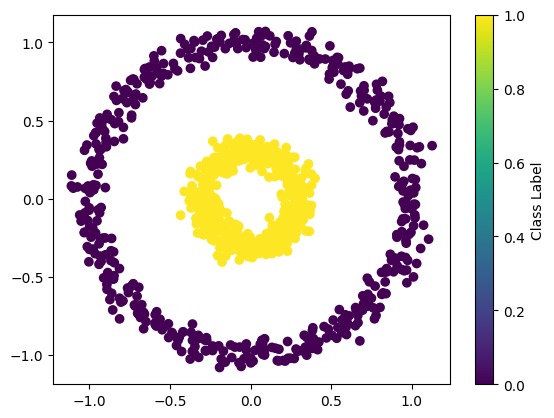

In [ ]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#plt.style.use('seaborn')
%matplotlib inline
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

plt.figure()
scatter = plt.scatter(X[:,0], X[:,1], c=y)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Class Label")
plt.show()

In [ ]:
import torch
from torch.utils.data import DataLoader,Dataset

## initializing data
len_train=int(0.7*(len(X)))
X_train=X[0:len_train]
Y_train=y[0:len_train]
X_test=X[len_train:]
Y_test=y[len_train:]

##initializing dataset
class Circle(Dataset):
  def __init__(self,X,y):
    self.feature=X
    self.label=y

  def __getitem__(self,index):
    x_data=self.feature[index]
    y_data=self.label[index]
    return x_data,y_data

  def __len__(self):
    return self.label.shape[0]

train_ds=Circle(X_train,Y_train)
test_ds=Circle(X_test,Y_test)

## dataloader

train_load=DataLoader(dataset=train_ds,batch_size=100,shuffle=True,drop_last=True)
test_load=DataLoader(dataset=test_ds,shuffle=True,batch_size=100,drop_last=True)


##making the network

class CircleModel(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layers=torch.nn.Sequential(

              torch.nn.Linear(2,30),
              torch.nn.ReLU(),
              torch.nn.Linear(30,50),
              torch.nn.ReLU(),
              torch.nn.Linear(50,20),
              torch.nn.ReLU(),
              torch.nn.Linear(20,2)
         )

  def forward(self,x):
    logit=self.layers(x)
    return logit

model=CircleModel()

## training Loop

import torch.nn.functional as F

optimizer=torch.optim.SGD(model.parameters(),lr=0.4)
num_epoch=15
losses=[]
for epoch in range(num_epoch):
  model.train()


  for batch_idx,(feature,label) in enumerate(train_load):
    logit=model(feature.float())
    loss=F.cross_entropy(logit,label)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    print(f"Epoch: {epoch+1:02d}/{num_epoch:02d}"
              f" | Batch {batch_idx:02d}/{len(train_load):02d}"
              f" | Train Loss: {loss:0.2f}")










Epoch: 01/15 | Batch 00/07 | Train Loss: 0.70
Epoch: 01/15 | Batch 01/07 | Train Loss: 0.69
Epoch: 01/15 | Batch 02/07 | Train Loss: 0.69
Epoch: 01/15 | Batch 03/07 | Train Loss: 0.69
Epoch: 01/15 | Batch 04/07 | Train Loss: 0.68
Epoch: 01/15 | Batch 05/07 | Train Loss: 0.68
Epoch: 01/15 | Batch 06/07 | Train Loss: 0.69
Epoch: 02/15 | Batch 00/07 | Train Loss: 0.68
Epoch: 02/15 | Batch 01/07 | Train Loss: 0.68
Epoch: 02/15 | Batch 02/07 | Train Loss: 0.68
Epoch: 02/15 | Batch 03/07 | Train Loss: 0.67
Epoch: 02/15 | Batch 04/07 | Train Loss: 0.69
Epoch: 02/15 | Batch 05/07 | Train Loss: 0.67
Epoch: 02/15 | Batch 06/07 | Train Loss: 0.67
Epoch: 03/15 | Batch 00/07 | Train Loss: 0.66
Epoch: 03/15 | Batch 01/07 | Train Loss: 0.67
Epoch: 03/15 | Batch 02/07 | Train Loss: 0.66
Epoch: 03/15 | Batch 03/07 | Train Loss: 0.65
Epoch: 03/15 | Batch 04/07 | Train Loss: 0.65
Epoch: 03/15 | Batch 05/07 | Train Loss: 0.64
Epoch: 03/15 | Batch 06/07 | Train Loss: 0.63
Epoch: 04/15 | Batch 00/07 | Train

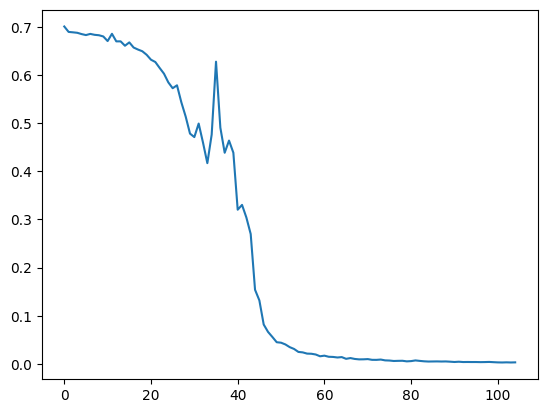

In [ ]:
plt.plot(losses)

In [ ]:
def compute_accuracy(model, dataloader):
    model = model.eval()
    correct=0.0
    total_examples = 0

    for idx, (feature, label) in enumerate(dataloader):
        with torch.no_grad():
            logit = model(feature.float())
        predictions = torch.argmax(logit, dim=1)
        compare = torch.argmax(logit, dim=1)
        compare = label == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)
    return (correct/total_examples)

print("test accuracy = ", compute_accuracy(model, test_load))

test accuracy =  tensor(1.)


# Chapter 2

In [ ]:
!import torch

/bin/bash: line 1: import: command not found


## Importing RAW file "VERDICT"

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
with open("the-verdict.txt",'r',encoding='utf-8') as f:
  raw_text=f.read()
  word_count=raw_text.split()
print(len(word_count)) #word count
print(len(raw_text)) #letter count
print(raw_text[:99])

3634
20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


## split a text on whitespace characters (Making a basic tokenizer)

In [ ]:
import re
text = "Hello, my name is Siddham^ Jain."
result=re.split(r'(\s)',text) ##seprate it by only whitespaces
result2=re.split(r'([,.]|\s)',text) ##seprate it by commas and fullstop ya jisse bhi seprate krna h
print(result)
print(result2)
result = [item.strip() for item in result if item.strip()] ##remove any word or whitespace
print(result)

['Hello,', ' ', 'my', ' ', 'name', ' ', 'is', ' ', 'Siddham^', ' ', 'Jain.']
['Hello', ',', '', ' ', 'my', ' ', 'name', ' ', 'is', ' ', 'Siddham^', ' ', 'Jain', '.', '']
['Hello,', 'my', 'name', 'is', 'Siddham^', 'Jain.']


### tokenizing the verdict text

In [ ]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:99])
print(len(preprocessed))

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter']
4690


In [ ]:
print(preprocessed[:40])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his']


## Creating a vocabulary

In [ ]:
all_words=sorted(set(preprocessed)) #creating list of all unique tokens
vocab_size=len(all_words)
print(vocab_size)
#we have unique without whitespace seprated words now

1130


In [ ]:
vocab={token:integer for integer,token in enumerate(all_words)} # harr word ko ek number dede (integer,token) unpack enumerate
for i,item in enumerate(vocab.items()):
  print(item)
  if(i>=50):
   break;


('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


## Implementing a simple text tokenizer

In [ ]:
  class SimpleTokeninzerV1:
    def __init__(self,vocab):
      self.str_int=vocab
      self.int_str={i:s for s,i in vocab.items()}

    def encode(self,text):
      preprocessed=re.split(r'([,.?_!"()\']|--|\s)',text)
      preprocessed=[i.strip() for i in preprocessed if i.strip()]
      ids=[self.str_int[s] for s in preprocessed]
      return ids

    def decode(self,ids):
      text=" ".join([self.int_str[i] for i  in ids])
      text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text



In [ ]:
tokenizer=SimpleTokeninzerV1(vocab)
text = """"It's the last he painted, you know,"
        Mrs. Gisburn said with pardonable pride."""
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [ ]:
class SimpleTokenizerV2:
  def __init__(self,vocab):
    self.str_int=vocab
    self.int_str={i:s for s,i in vocab.items()}


  def encode(self,text):
    preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
    preprocessed=[i.strip() for i in preprocessed if i.strip()]
    preprocessed=[item if item in self.str_int else "<|unk|>" for item in preprocessed]
    ids=[self.str_int[s] for s in preprocessed]
    return ids


  def decode(self,ids):
    text=" ".join(self.int_str[i] for i in ids)
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text




In [ ]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [ ]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


##Byte Pair Encoding

In [ ]:
pip install tiktoken==0.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00


In [ ]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.7.0


In [ ]:
tokenizer=tiktoken.get_encoding("gpt2")

In [ ]:
text = (
 "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
 "of someunknownPlace."
)
integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [ ]:
strings=tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [ ]:
check=tokenizer.encode("“Akwirw ier")
print(check)

[447, 250, 33901, 86, 343, 86, 220, 959]


In [ ]:

pric=tokenizer.decode(check)


##Data sampling with a sliding window

In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
with open("/content/drive/MyDrive/the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()

enc_text=tokenizer.encode(raw_text)
print(enc_text[:50])
print(len(enc_text))

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11]
5145


In [ ]:
enc_sample=enc_text[50:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
content_size=4
x=enc_sample[:content_size]
y=enc_sample[1:content_size+1]
print(f'x= {x}')
print(f'y= {y}')

x= [290, 4920, 2241, 287]
y= [4920, 2241, 287, 257]


In [ ]:
for i in range(1,content_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print(context,"------>",desired)

[290] ------> 4920
[290, 4920] ------> 2241
[290, 4920, 2241] ------> 287
[290, 4920, 2241, 287] ------> 257


In [ ]:
for i in range(1,content_size+1):
  context=enc_sample[:i]
  desired=enc_sample[i]
  print(tokenizer.decode(context),"------>",tokenizer.decode([desired])) #list bana rahe hai kyuki desired ek single integer hai par decode expects list of integers

 and ------>  established
 and established ------>  himself
 and established himself ------>  in
 and established himself in ------>  a


### Dataset

In [ ]:
import torch
from torch.utils.data import DataLoader,Dataset

class GPTDataV1:
  def __init__(self,max_length,strider,txt,tokenizer):
    self.input_ds=[]
    self.output_ds=[]

    token_ids=tokenizer.encode(txt)

    for i in range(0,len(token_ids)-max_length,strider):
      input_chunk=token_ids[i:i+max_length]
      output_chunk=token_ids[i+1:i+max_length+1]
      self.input_ds.append(torch.tensor(input_chunk))
      self.output_ds.append(torch.tensor(output_chunk))

  def __len__(self):
    return len(self.input_ds)


  def __getitem__(self,idx):
    return self.input_ds[idx],self.output_ds[idx]


### DataLoader

In [ ]:
def dataloadv1(txt,batch_size=4,max_length=256,strider=392,shuffle=True,drop_last=True,num_workers=0): #random values (just declaring)
  tokenizer=tiktoken.get_encoding("gpt2")
  dataset=GPTDataV1(max_length,strider,txt,tokenizer)
  dataloader=DataLoader(dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last,num_workers=num_workers)
  return dataloader

In [ ]:
!pwd

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
with open ("the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()

In [ ]:
dataloader=dataloadv1(raw_text,batch_size=2,max_length=3,strider=1,shuffle=False)
data_iter=iter(dataloader)
x,output=next(data_iter)

print("Inputs:\n", x)
print("\nTargets:\n", output)

Inputs:
 tensor([[  40,  367, 2885],
        [ 367, 2885, 1464]])

Targets:
 tensor([[ 367, 2885, 1464],
        [2885, 1464, 1807]])


## Creating token embeddings

In [ ]:
input_ids=torch.tensor([3,2,1,34,35])

In [ ]:
vocab_size=6
output_dim=4

In [ ]:
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035, -0.5880],
        [ 0.3486,  0.6603, -0.2196, -0.3792],
        [-0.1606, -0.4015,  0.6957, -1.8061],
        [ 1.8960, -0.1750,  1.3689, -1.6033],
        [-0.7849, -1.4096, -0.4076,  0.7953],
        [ 0.9985,  0.2212,  1.8319, -0.3378]], requires_grad=True)


## In class exercise

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00


In [ ]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")

txt="My name is Siddham Jain"
intOfTxt=tokenizer.encode(txt)
print(intOfTxt)

[3666, 1438, 318, 44487, 2763, 449, 391]


In [ ]:
txtofInt=tokenizer.decode(intOfTxt)
print(txtofInt)

My name is Siddham Jain


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
with open('the-verdict.txt','r',encoding='utf-8') as f:
  raw_text=f.read()
enc_text=tokenizer.encode(raw_text)
print(len(enc_text))
print("T no. of characters:", len(raw_text))
print(raw_text[:99])
print(enc_text)

5145
T no. of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 
[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11, 290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11,

In [ ]:
enc_sample=enc_text[50:]

content_size=4
x=enc_sample[:content_size]
y=enc_sample[1:content_size+1]
print(f"x -{x}")
print (f"y-{y}")

x -[290, 4920, 2241, 287]
y-[4920, 2241, 287, 257]


In [ ]:

import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt)
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [ ]:
txt_as_dataset=GPTDatasetV1(raw_text,tokenizer,7,2)

In [ ]:
print(txt_as_dataset.input_ids[2])

tensor([ 1807,  3619,   402,   271, 10899,  2138,   257])


In [ ]:
print(txt_as_dataset.target_ids[2])

tensor([ 3619,   402,   271, 10899,  2138,   257,  7026])


In [ ]:
#dataloader=DataLoader(dataset=txt,shuffle=True,batch_size=4,drop_last=True)

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
        stride=128, shuffle=True, drop_last=True,
        num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )
    return dataloader

In [ ]:
# demo use of dataloader

demo_dataLoader = create_dataloader_v1(raw_text, batch_size=5, max_length=6,stride=1, shuffle=False)


In [ ]:
list(demo_dataLoader)[0]  #batch size 1

[tensor([[   40,   367,  2885,  1464,  1807,  3619],
         [  367,  2885,  1464,  1807,  3619,   402],
         [ 2885,  1464,  1807,  3619,   402,   271],
         [ 1464,  1807,  3619,   402,   271, 10899],
         [ 1807,  3619,   402,   271, 10899,  2138]]),
 tensor([[  367,  2885,  1464,  1807,  3619,   402],
         [ 2885,  1464,  1807,  3619,   402,   271],
         [ 1464,  1807,  3619,   402,   271, 10899],
         [ 1807,  3619,   402,   271, 10899,  2138],
         [ 3619,   402,   271, 10899,  2138,   257]])]

In [ ]:
data_iterator = iter(demo_dataLoader)
next(data_iterator)


[tensor([[   40,   367,  2885,  1464,  1807,  3619],
         [  367,  2885,  1464,  1807,  3619,   402],
         [ 2885,  1464,  1807,  3619,   402,   271],
         [ 1464,  1807,  3619,   402,   271, 10899],
         [ 1807,  3619,   402,   271, 10899,  2138]]),
 tensor([[  367,  2885,  1464,  1807,  3619,   402],
         [ 2885,  1464,  1807,  3619,   402,   271],
         [ 1464,  1807,  3619,   402,   271, 10899],
         [ 1807,  3619,   402,   271, 10899,  2138],
         [ 3619,   402,   271, 10899,  2138,   257]])]

In [ ]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)   # not technically for algo. Just put in here for the reproduction of example
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [ ]:
input_ids=torch.tensor([1]) #first word ka embedding dedo
embedding_layer(input_ids)

tensor([[0.9178, 1.5810, 1.3010]], grad_fn=<EmbeddingBackward0>)

In [ ]:

input_ids=torch.tensor([1,3])
embedding_layer(input_ids)

tensor([[ 0.9178,  1.5810,  1.3010],
        [-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)

In [ ]:
context_length = 4
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

pos_embeddings = pos_embedding_layer(torch.arange(context_length))
pos_embeddings


tensor([[-0.6307,  1.2340,  0.3127],
        [ 0.6972, -0.9950, -1.1476],
        [-0.9178,  0.9045, -2.0975],
        [ 1.1558, -1.2157,  0.1295]], grad_fn=<EmbeddingBackward0>)

In [ ]:
token_embeddings = embedding_layer(input_ids)
token_embeddings

tensor([[ 0.9178,  1.5810,  1.3010],
        [-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)

In [ ]:
input_embedding = token_embeddings + pos_embeddings
input_embedding

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 0

#Chapter 3

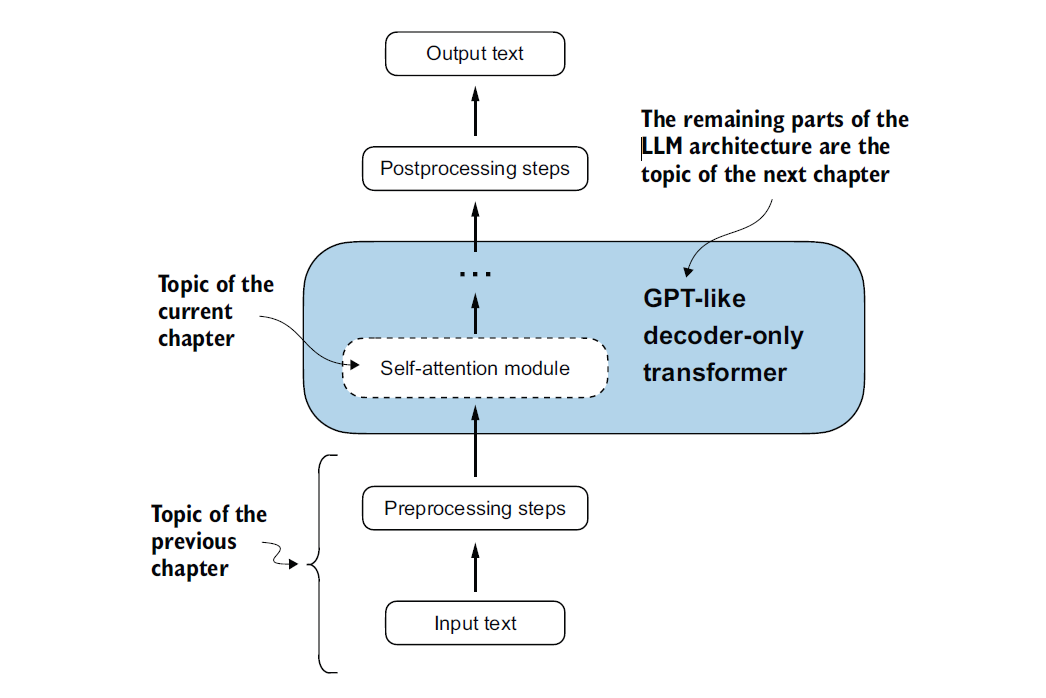![image.png](
)

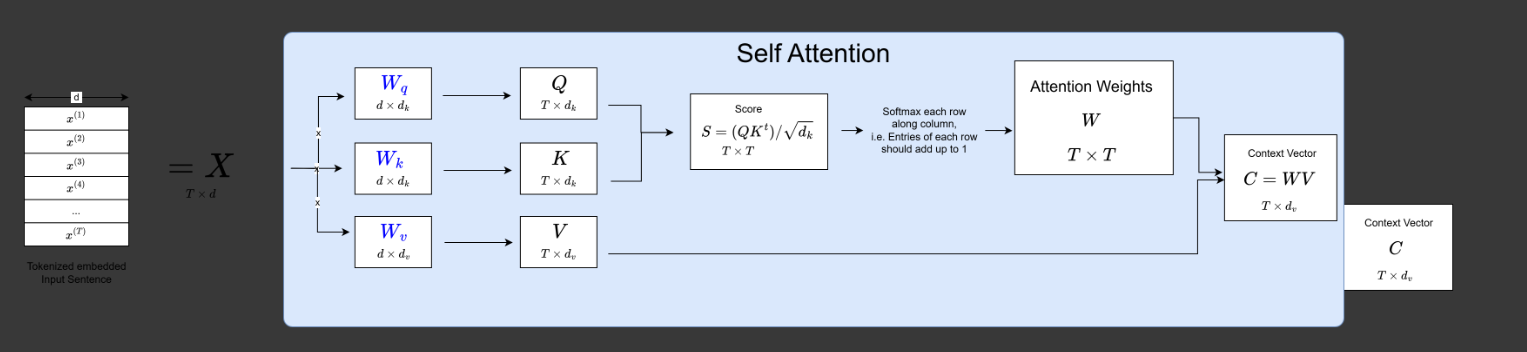

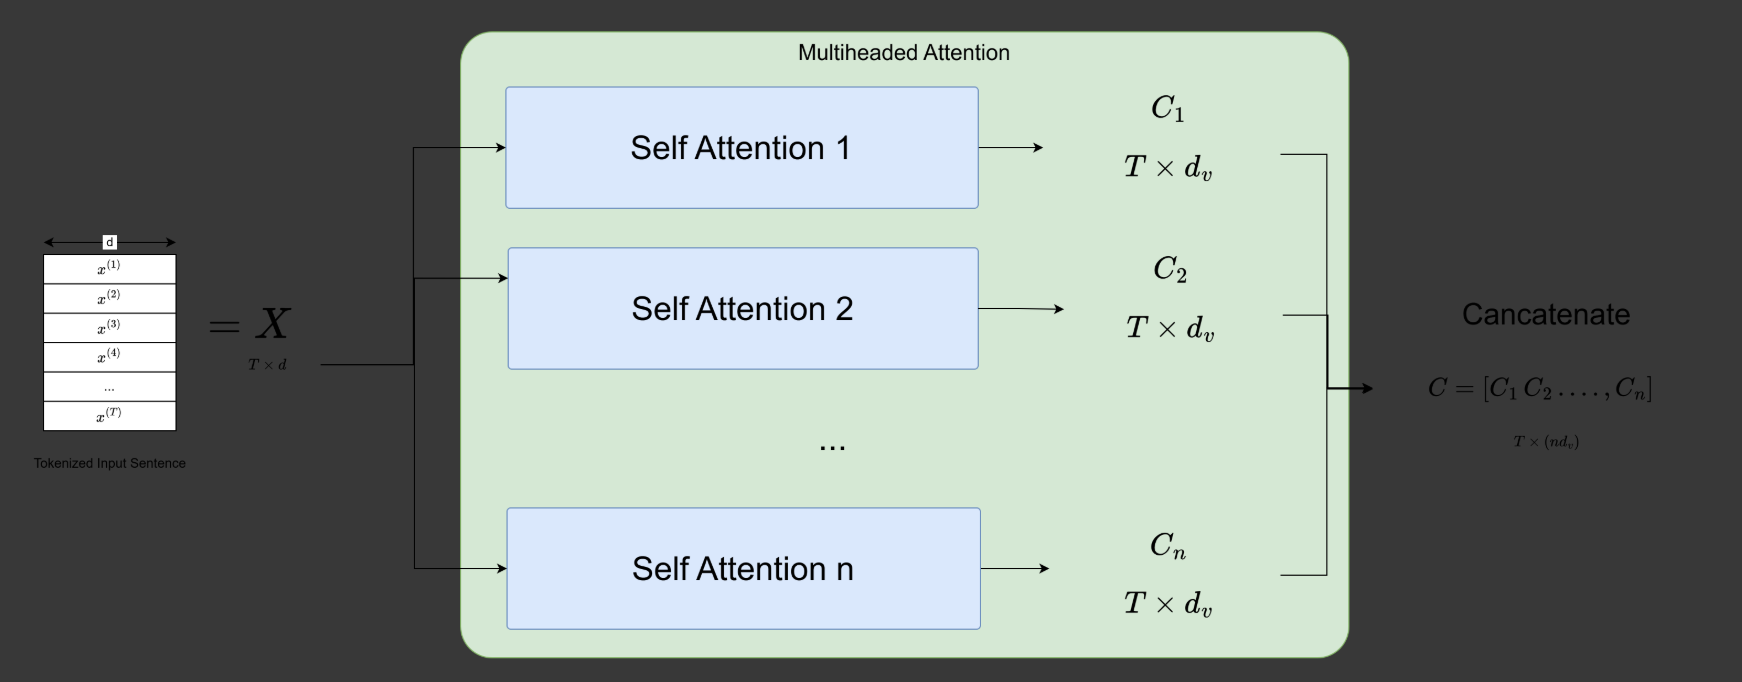

In [ ]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)
  print(attn_scores_2)

tensor([ 9.5440e-01,  4.5382e-41, -7.3418e+14,  4.5382e-41,  6.7963e-43,
         0.0000e+00])
tensor([ 9.5440e-01,  1.4950e+00, -7.3418e+14,  4.5382e-41,  6.7963e-43,
         0.0000e+00])
tensor([9.5440e-01, 1.4950e+00, 1.4754e+00, 4.5382e-41, 6.7963e-43, 0.0000e+00])
tensor([9.5440e-01, 1.4950e+00, 1.4754e+00, 8.4340e-01, 6.7963e-43, 0.0000e+00])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 0.0000])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [ ]:
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)


attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())


Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [ ]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i]*x_i
  print(context_vec_2)

tensor([0.0596, 0.0208, 0.1233])
tensor([0.1904, 0.2277, 0.2803])
tensor([0.3234, 0.4260, 0.4296])
tensor([0.3507, 0.4979, 0.4705])
tensor([0.4340, 0.5250, 0.4813])
tensor([0.4419, 0.6515, 0.5683])


In [ ]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i, j] =  torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [ ]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [ ]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
 def __init__(self, d_in, d_out):
  super().__init__()
  self.W_query = nn.Parameter(torch.rand(d_in, d_out))
  self.W_key = nn.Parameter(torch.rand(d_in, d_out))
  self.W_value = nn.Parameter(torch.rand(d_in, d_out))
 def forward(self, x):
  keys = x @ self.W_key
  queries = x @ self.W_query
  values = x @ self.W_value
  attn_scores = queries @ keys.T # omega
  attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
  context_vec = attn_weights@values
  return context_vec

In [ ]:
class SelfAttention_v2(nn.Module):
  def __init__(self, d_in, d_out, qkv_bias=False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
  def forward(self, x):
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)
    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(
    attn_scores / keys.shape[-1]**0.5, dim=-1
)
    context_vec = attn_weights @ values
    return context_vec

In [ ]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

##In class

In [ ]:
import torch

d=3 #hyper parameter hai (d) jo humari dimension hai 20000 ki dic hai toh suppose 3 ka leliya vector jisse related sab kuch h
T=10  #number of words
X=torch.rand((T,d))
print(X)
print(X.shape)

tensor([[0.9912, 0.3442, 0.8502],
        [0.2069, 0.4965, 0.5921],
        [0.7286, 0.2027, 0.7271],
        [0.6794, 0.2125, 0.0641],
        [0.5085, 0.6832, 0.5739],
        [0.2131, 0.7319, 0.0365],
        [0.7083, 0.2075, 0.4922],
        [0.5517, 0.0164, 0.4870],
        [0.3207, 0.8134, 0.8000],
        [0.4720, 0.8059, 0.5039]])
torch.Size([10, 3])


In [ ]:
dk=dv=embed_dim=6 #number of columns in Wq,Wk,Wv (This means that after applying the Linear layers, each token in the input will be projected into a 6-dimensional vector.)

qLayer=torch.nn.Linear(d,embed_dim);Q=qLayer(X) #we are creating pipeline
kLayer=torch.nn.Linear(d,embed_dim);K=kLayer(X)
vLayer=torch.nn.Linear(d,embed_dim);V=vLayer(X)


print("Q Shape:", Q.shape)
print("K Shape:", K.shape)
print("V Shape:", V.shape)

Q Shape: torch.Size([10, 6])
K Shape: torch.Size([10, 6])
V Shape: torch.Size([10, 6])


In [ ]:
print(qLayer.weight.shape)
print(qLayer.bias.shape)

torch.Size([6, 3])
torch.Size([6])


In [ ]:
num_heads=1 #self
attentionLayer=torch.nn.MultiheadAttention(embed_dim,num_heads)
content_vector, attn_weight = attentionLayer(Q, K, V)
print(content_vector.shape)


print(attn_weight.shape)

torch.Size([10, 6])
torch.Size([10, 10])


In [ ]:
class MyToyAttention_2(torch.nn.Module):
    def __init__(self, d, dk):
        super().__init__()
        self.qLayer = torch.nn.Linear(d, dk)
        self.kLayer = torch.nn.Linear(d, dk)
        self.vLayer = torch.nn.Linear(d, dk)

    def forward(self, X):
        Q = self.qLayer(X); K = self.kLayer(X); V = self.vLayer(X)
        score = Q @ K.T /dk**0.5
        attn_weight=torch.softmax(score,dim=-1)
        context_vector=attn_weight @V
        return context_vector,attn_weight


MyAttentionLayer2=MyToyAttention_2(d,dk)

In [ ]:
MyAttentionLayer2(X)

In [ ]:
class Myattention(MyToyAttention_2):
   def __init__(self,d,dk):
     super().__init__(d, dk)

   def times(self, i):
    for x in range(i):
      context_vector, attn_weight = self.forward(X)

attn_layer = Myattention(d, dk)
attn_layer.times(3)

#Hugging face

In [ ]:
from transformers import pipeline

In [ ]:
import torch
import os
torch.cuda.empty_cache()  # Clear any existing allocationstorch.backends.cudnn.benchmark = True  # Enable cuDNN auto-tuner
    # Add this before creating your pipeline
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:64"

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()

gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=ad6091740d91958810f70d7ef4cf06632db7a38179896a535e4969b626e7fbd2
  Stored in directory: /root/.cache/pip/wheels/2b/4d/8f/55fb4f7b9b591891e8d3f72977c4ec6c7763b39c19f0861595
Successfully built gputil
Gen RAM Free: 11.8 GB  |     Proc size: 132.3 MB
GPU RAM Free: 15095MB | Used: 0MB | Util   0% | Total     15360MB


In [ ]:
transcriber=pipeline(task="automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")


{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

 https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=trending

In [ ]:
transcriber =pipeline(model="openai/whisper-large-v3-turbo",torch_dtype='auto')

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

In [ ]:

transcriber = pipeline(model="openai/whisper-large-v2", my_parameter=1)

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0


TypeError: AutomaticSpeechRecognitionPipeline._sanitize_parameters() got an unexpected keyword argument 'my_parameter'

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device=0)

Device set to use cuda:0


In [ ]:
pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device_map="auto")

Device set to use cuda:0


In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device=0, batch_size=2)
audio_filenames = [f"https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/{i}.flac" for i in range(1, 5)]
texts = transcriber(audio_filenames)

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", return_timestamps=True)
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

Device set to use cuda:0


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 16.12 MiB is free. Process 6114 has 14.72 GiB memory in use. Of the allocated memory 14.11 GiB is allocated by PyTorch, and 492.92 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", chunk_length_s=30)
transcriber("https://huggingface.co/datasets/reach-vb/random-audios/resolve/main/ted_60.wav")

In [ ]:
def data():
    for i in range(1000):
        yield f"My example {i}"


pipe = pipeline(model="openai-community/gpt2", device=0)
generated_characters = 0
for out in pipe(data()):
    generated_characters += len(out[0]["generated_text"])

In [ ]:
from transformers.pipelines.pt_utils import KeyDataset
from datasets import load_dataset

pipe = pipeline(model="hf-internal-testing/tiny-random-wav2vec2", device=0)
dataset = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation[:10]")

for out in pipe(KeyDataset(dataset, "audio")):
    print(out)

In [ ]:
from transformers import pipeline

vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

In [ ]:
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

In [ ]:
vqa = pipeline(model="impira/layoutlm-document-qa")
output = vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What is the invoice number?",
)
output[0]["score"] = round(output[0]["score"], 3)
output

In [ ]:

pipe = pipeline(model="facebook/opt-1.3b", torch_dtype=torch.bfloat16, device_map="auto")
output = pipe("This is a cool example!", do_sample=True, top_p=0.95)

In [ ]:

pipe = pipeline(model="facebook/opt-1.3b", device_map="auto", model_kwargs={"load_in_8bit": True})
output = pipe("This is a cool example!", do_sample=True, top_p=0.95)

In [ ]:
pip install gradio

In [ ]:
from transformers import pipeline
import gradio as gr

pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

gr.Interface.from_pipeline(pipe).launch()